In [54]:
import pandas as pd

In [55]:
base = pd.read_csv('house_prices.csv')

In [56]:
base.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [57]:
base.shape

(21613, 21)

In [58]:
X = base.iloc[:, 5].values
X = X.reshape(-1, 1)

In [59]:
X.shape

(21613, 1)

In [60]:
y = base.iloc[:, 2:3].values

In [61]:
y.shape

(21613, 1)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [63]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [64]:
X

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [65]:
y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

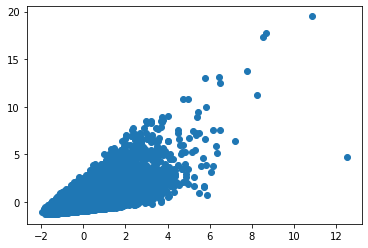

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

In [67]:
import numpy as np

In [68]:
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [69]:
import tensorflow

In [70]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [71]:
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

In [72]:
batch_size = 32
xph = tf.placeholder(tf.float32, [batch_size, 1])
yph = tf.placeholder(tf.float32, [batch_size, 1])

In [75]:
y_model = b0 + b1 * xph
erro = tf.losses.mean_squared_error(yph, y_model)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
training = optimizer.minimize(erro)
init = tf.global_variables_initializer()

In [82]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        index = np.random.randint(len(X), size=batch_size)
        feed = {xph: X[index], yph: y[index]}
        sess.run(training, feed_dict=feed)
    b0_final, b1_final = sess.run([b0, b1])

In [83]:
b0_final

0.0012459583

In [84]:
b1_final

0.7083216

In [85]:
predictions = b0_final + b1_final * X
predictions

array([[-0.69279232],
       [ 0.37923067],
       [-1.00900055],
       ...,
       [-0.81619065],
       [-0.36887171],
       [-0.81619065]])

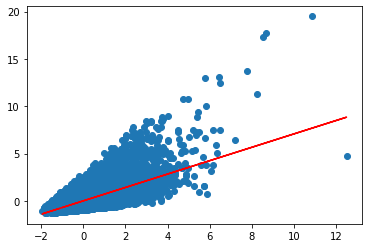

In [86]:
plt.plot(X, y, 'o')
plt.plot(X, predictions, color='red')

In [87]:
y1 = scaler_y.inverse_transform(y)
predictions1 = scaler_y.inverse_transform(predictions)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, predictions1)

In [92]:
# Vendo a média de erro é alta por conta da Regressão Linear Simples
# Quando adicionamos mais variaveis que influenciam, neste caso no valor das casas, esse erro diminui
mae

174118.91697793384